In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from xgboost import plot_tree
import graphviz
from xgboost import to_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.mplot3d import Axes3D



In [58]:

train_data = pd.read_csv('train.csv')
train_data.describe()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.614162e+04,1.475170e+01,-2.077315e+02,1.908400e-01,8.531908e-01,-1.443849e+02,-1.828275e+02,-1.266902e+01,9.514050e-01,-1.830022e+02,...,2.942221e+01,9.187425e-01,-5.183805e+01,-5.103860e+01,2.900030e+03,1.662333e-01,8.209933e-01,-1.338948e+02,-4.919965e+01,-5.223401e+01
std,2.790366e+04,4.038073e+00,4.054632e+02,3.929634e-01,3.539157e-01,3.545035e+02,3.854803e+02,1.049158e+02,2.150199e-01,3.853958e+02,...,6.029159e+00,2.732303e-01,2.153209e+02,2.150846e+02,7.686446e+03,3.722901e-01,3.833581e-01,3.628977e+02,2.147605e+02,2.152330e+02
min,1.115380e+03,1.000000e+00,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,...,7.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,4.137650e+03,1.300000e+01,-6.389485e-01,0.000000e+00,1.000000e+00,0.000000e+00,-3.000639e+00,-5.711142e+00,1.000000e+00,-3.367626e+00,...,2.600000e+01,1.000000e+00,-1.469941e+01,-1.310509e+01,-1.438680e-05,0.000000e+00,1.000000e+00,9.222748e-06,-4.503331e+00,-1.619484e+01
50%,8.069835e+03,1.600000e+01,-5.329026e-01,0.000000e+00,1.000000e+00,3.200000e+00,-2.321410e+00,-1.988139e+00,1.000000e+00,-1.956064e+00,...,3.000000e+01,1.000000e+00,-1.207258e-06,-2.356098e+00,5.780127e+02,0.000000e+00,1.000000e+00,2.468449e+00,-4.697510e-01,-2.928758e-06
75%,1.750157e+04,1.800000e+01,-5.933819e-02,0.000000e+00,1.000000e+00,3.200000e+00,5.918621e-01,1.669210e+00,1.000000e+00,4.339380e-01,...,3.400000e+01,1.000000e+00,8.465107e+00,1.674137e+00,3.046122e+03,0.000000e+00,1.000000e+00,8.502449e+00,1.300086e+00,8.922095e+00
max,4.750951e+06,3.000000e+01,4.791513e+00,1.000000e+00,1.000000e+00,3.200000e+00,4.341298e+00,1.471079e+01,1.000000e+00,2.153017e+00,...,5.200000e+01,1.000000e+00,1.588015e+02,1.861542e+02,8.682200e+05,1.000000e+00,1.000000e+00,2.805800e+02,1.428335e+02,1.462984e+02


In [59]:
particle_count = train_data['Label'].value_counts()

print(particle_count)

statistical_count = train_data.describe()

# print(statistical_count)




Label
Muon        200000
Ghost       200000
Pion        200000
Proton      200000
Kaon        200000
Electron    200000
Name: count, dtype: int64


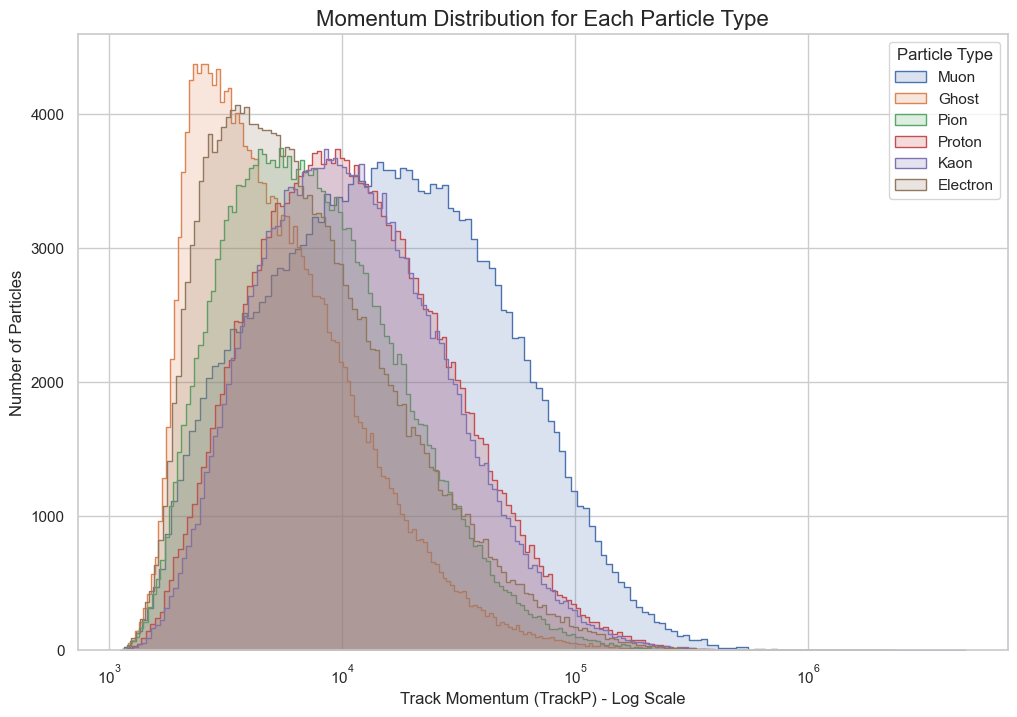

In [60]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

particle_types = train_data['Label'].unique()

for particle in particle_types:
    
    subset = train_data[train_data['Label'] == particle]
    
    sns.histplot(data=subset, x='TrackP', log_scale=True, element="step", common_norm=False, fill=True, alpha=0.2, label=particle)

plt.title('Momentum Distribution for Each Particle Type', fontsize=16)
plt.xlabel('Track Momentum (TrackP) - Log Scale', fontsize=12)
plt.ylabel('Number of Particles', fontsize=12)
plt.legend(title='Particle Type')
plt.show()


In [61]:
print("Replacing -999.0 with 0")
train_data.replace(-999.0, 0, inplace=True)
train_data.describe()

Replacing -999.0 with 0


,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.614162e+04,1.475170e+01,2.801433e-02,1.908400e-01,8.531908e-01,2.274109e+00,-6.290049e-01,-1.521012e+00,9.514050e-01,-8.037806e-01,...,2.942221e+01,9.187425e-01,-3.354910e+00,-2.555466e+00,3.134783e+03,1.662333e-01,8.209933e-01,1.470232e+01,-7.165132e-01,-3.750871e+00
std,2.790366e+04,4.038073e+00,9.269096e-01,3.929634e-01,3.539157e-01,1.451061e+00,2.036260e+00,5.351937e+00,2.150199e-01,1.639315e+00,...,6.029159e+00,2.732303e-01,2.458290e+01,2.061759e+01,7.578274e+03,3.722901e-01,3.833581e-01,3.094841e+01,1.036727e+01,2.459449e+01
min,1.115380e+03,1.000000e+00,-1.569855e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.283677e+00,-6.408299e+01,0.000000e+00,-4.990905e+00,...,7.000000e+00,0.000000e+00,-2.403396e+02,-1.647727e+02,-4.408835e-05,0.000000e+00,0.000000e+00,-4.648333e-05,-1.195129e+02,-2.306546e+02
25%,4.137650e+03,1.300000e+01,-5.535865e-01,0.000000e+00,1.000000e+00,0.000000e+00,-2.611658e+00,-5.534746e+00,1.000000e+00,-2.355204e+00,...,2.600000e+01,1.000000e+00,-9.651880e+00,-9.949139e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.222748e-06,-3.199227e+00,-1.096913e+01
50%,8.069835e+03,1.600000e+01,-1.920042e-01,0.000000e+00,1.000000e+00,3.200000e+00,-6.366176e-01,-1.822426e+00,1.000000e+00,0.000000e+00,...,3.000000e+01,1.000000e+00,0.000000e+00,-1.396590e+00,5.780127e+02,0.000000e+00,1.000000e+00,2.468449e+00,-1.630080e-01,0.000000e+00
75%,1.750157e+04,1.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.200000e+00,5.918621e-01,1.669210e+00,1.000000e+00,4.339380e-01,...,3.400000e+01,1.000000e+00,8.465107e+00,1.674137e+00,3.046122e+03,0.000000e+00,1.000000e+00,8.502449e+00,1.300086e+00,8.922095e+00
max,4.750951e+06,3.000000e+01,4.791513e+00,1.000000e+00,1.000000e+00,3.200000e+00,4.341298e+00,1.471079e+01,1.000000e+00,2.153017e+00,...,5.200000e+01,1.000000e+00,1.588015e+02,1.861542e+02,8.682200e+05,1.000000e+00,1.000000e+00,2.805800e+02,1.428335e+02,1.462984e+02


In [62]:
y = train_data['Label']
X = train_data.drop('Label', axis=1)

print("X and y created successfully")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73)

print("Done Splitting")

X and y created successfully
Done Splitting


In [63]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (840000, 49)
y_train shape: (840000,)
X_test shape: (360000, 49)
y_test shape: (360000,)


In [64]:
lab_enc = LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.transform(y_test)
print("Label mapping:")
for i, class_name in enumerate(lab_enc.classes_):
    print(f"'{class_name}' -> {i}")


Label mapping:
'Electron' -> 0
'Ghost' -> 1
'Kaon' -> 2
'Muon' -> 3
'Pion' -> 4
'Proton' -> 5


In [65]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=73, n_jobs=-1)
# rf_model.fit(X_train, y_train)
# print("Training complete")

In [66]:
# y_pred = rf_model.predict(X_test)
# print("Predictions complete.")

# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [67]:
xgb_model = XGBClassifier(n_estimators=100, random_state=73, use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train, y_train_encoded)
print("Training Complete")


/Users/omkarsarkar/Desktop/Projects/particle_detector/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:02:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Complete


In [68]:
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"\nXGBoost Model Accuracy: {accuracy_xgb * 100:.2f}%")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=lab_enc.classes_))



XGBoost Model Accuracy: 77.41%
              precision    recall  f1-score   support

    Electron       0.89      0.89      0.89     59937
       Ghost       0.77      0.81      0.79     59990
        Kaon       0.66      0.63      0.64     60218
        Muon       0.92      0.92      0.92     60075
        Pion       0.73      0.79      0.76     59946
      Proton       0.67      0.61      0.64     59834

    accuracy                           0.77    360000
   macro avg       0.77      0.77      0.77    360000
weighted avg       0.77      0.77      0.77    360000



In [69]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)
print("Data scaling complete")


Data scaling complete


In [70]:
# nn_model = keras.Sequential([
#   keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#   keras.layers.Dense(64, activation='relu'),
#   keras.layers.Dense(6, activation='softmax')
# ])
# nn_model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )
# print("Model Summary")


# nn_model.summary()

/var/folders/3j/dck9r_d16v73q_hpvyypvl7m0000gn/T/ipykernel_93398/2887559423.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


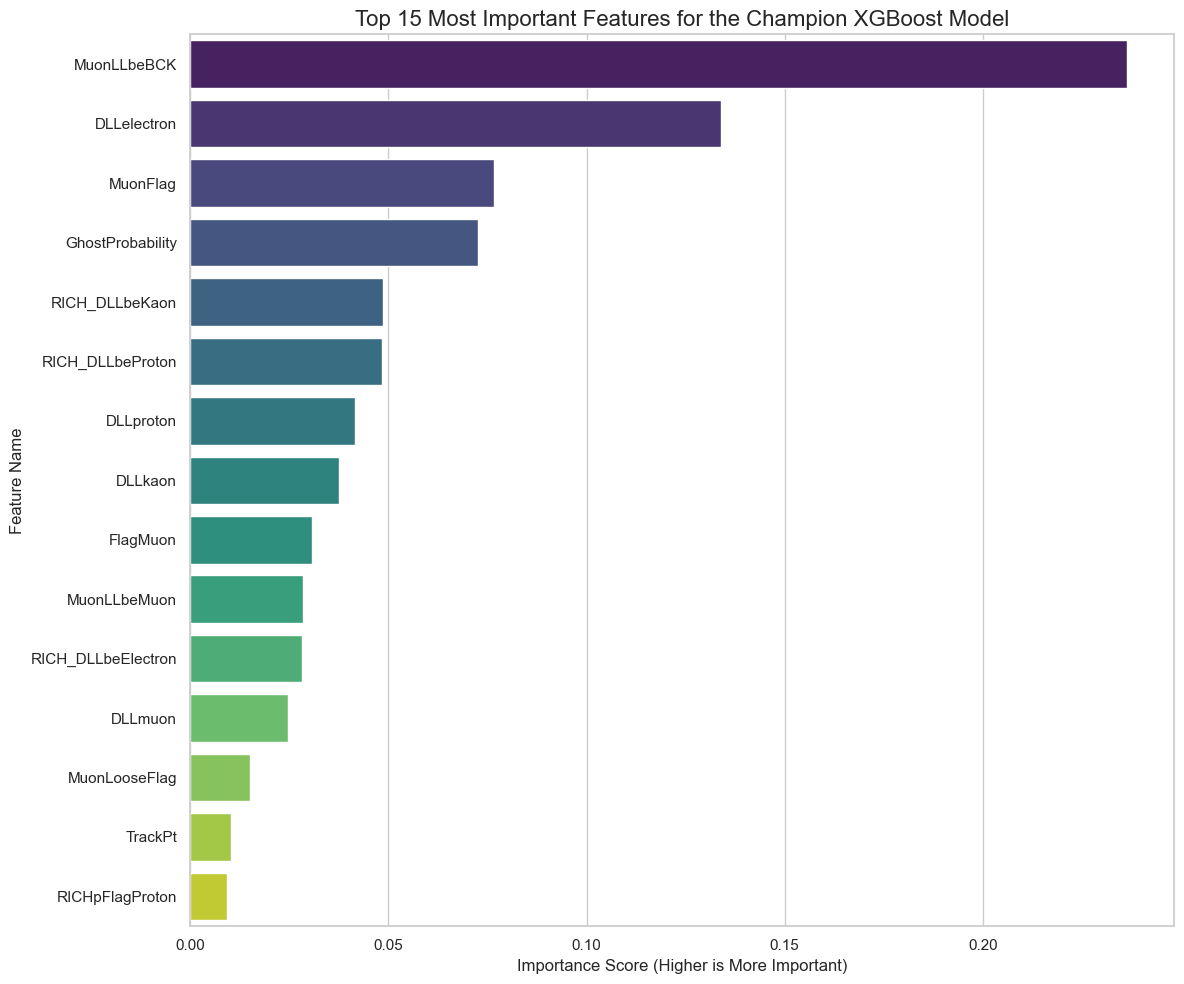

In [71]:

importances = xgb_model.feature_importances_
feature_names = X.columns # Assumes 'X' is your DataFrame of features

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for the Champion XGBoost Model', fontsize=16)
plt.xlabel('Importance Score (Higher is More Important)', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.tight_layout()
plt.show()




--- Generating Visual #2: Confusion Matrix ---


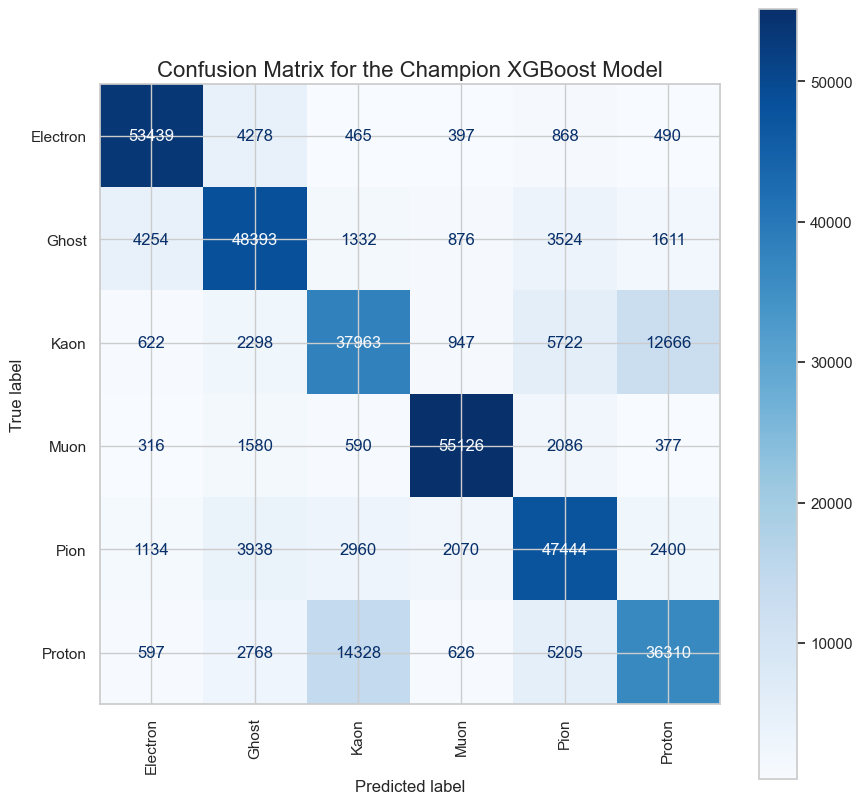

In [72]:

print("\n--- Generating Visual #2: Confusion Matrix ---")

cm = confusion_matrix(y_test_encoded, y_pred_xgb, labels=xgb_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lab_enc.classes_)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix for the Champion XGBoost Model', fontsize=16)
plt.show()


In [73]:
pred_probabilities = xgb_model.predict_proba(X_test)

print(f"Probabilities generated. The shape of the output is: {pred_probabilities.shape}")

print("\nProbabilities for the first 5 particles:")
print(np.round(pred_probabilities[:5], 3))

confidence_scores = np.max(pred_probabilities, axis=1)

print("\nConfidence scores for the first 5 particles:")
print(np.round(confidence_scores[:5], 3))

anomaly_df = pd.DataFrame({
    'Original_ID': X_test.index,
    'Confidence': confidence_scores
})

most_anomalous_particles = anomaly_df.sort_values(by='Confidence', ascending=True)

print(most_anomalous_particles.head(10))

Probabilities generated. The shape of the output is: (360000, 6)

Probabilities for the first 5 particles:
[[0.    0.002 0.019 0.    0.027 0.952]
 [0.    0.    0.    1.    0.    0.   ]
 [0.001 0.003 0.001 0.991 0.004 0.001]
 [0.    0.    0.    1.    0.    0.   ]
 [0.096 0.002 0.316 0.123 0.243 0.219]]

Confidence scores for the first 5 particles:
[0.952 1.    0.991 1.    0.316]
        Original_ID  Confidence
149045       259134    0.189651
194264       559499    0.205173
227217       226342    0.205907
196953        77138    0.207381
89803        924042    0.208700
232049      1098558    0.208990
40102         86499    0.211185
269101       131113    0.212603
112257      1106297    0.212860
339549       362021    0.213131


In [74]:
top_anomaly_id = most_anomalous_particles.iloc[0]['Original_ID']


anomaly_index_in_preds = X_test.index.get_loc(top_anomaly_id)
anomaly_probs = pred_probabilities[anomaly_index_in_preds]

prob_report = pd.Series(anomaly_probs, index=lab_enc.classes_)

print("\nModel's Probability Breakdown for this Particle:")
print(prob_report.sort_values(ascending=False))


Model's Probability Breakdown for this Particle:
Proton      0.189651
Electron    0.189341
Kaon        0.184387
Muon        0.166751
Ghost       0.137533
Pion        0.132338
dtype: float32


In [75]:
top_10_anomaly_ids = most_anomalous_particles.head(10)['Original_ID']

top_10_anomaly_features = X_test.loc[top_10_anomaly_ids]

print(top_10_anomaly_features.describe())



results_df = pd.DataFrame({
    'Original_ID': X_test.index,
    'Prediction': y_pred_xgb, 
    'Confidence': confidence_scores
})

confident_muons = results_df[
    (results_df['Prediction'] == 3) & (results_df['Confidence'] > 0.999)
].head(10)

confident_muon_features = X_test.loc[confident_muons['Original_ID']]

print(confident_muon_features.describe())


             TrackP  TrackNDoFSubdetector2  BremDLLbeElectron  MuonLooseFlag  \
count     10.000000              10.000000          10.000000           10.0   
mean   38601.938069              11.200000           0.039541            0.0   
std    34080.595010               6.494442           0.405027            0.0   
min     1934.880003               3.000000          -0.542401            0.0   
25%     2726.747420               7.000000           0.000000            0.0   
50%    41447.689447               8.000000           0.000000            0.0   
75%    69586.087888              15.750000           0.000000            0.0   
max    79357.820309              21.000000           0.754688            0.0   

         FlagSpd       SpdE  EcalDLLbeElectron    DLLmuon  RICHpFlagElectron  \
count  10.000000  10.000000          10.000000  10.000000          10.000000   
mean    0.100000   0.320000           0.169532  -0.247415           0.800000   
std     0.316228   1.011929           0


--- Visual 1: Muon Identification with MuonFlag ---


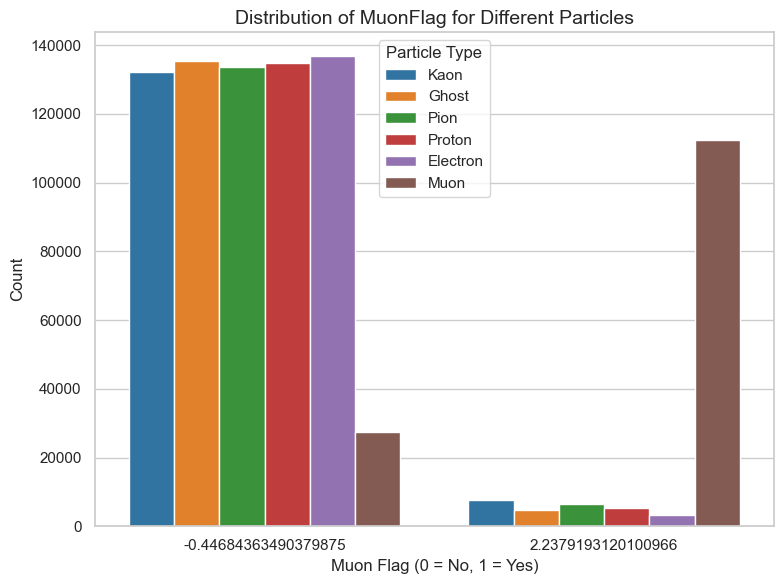

In [76]:
print("\n--- Visual 1: Muon Identification with MuonFlag ---")

# Let's use a sample of the full X_train and y_train_encoded for plotting
# Otherwise, plotting all 840k points might be slow or clunky
plot_df = pd.DataFrame(X_train_scaled, columns=X.columns) # Use scaled data for consistency
plot_df['Particle_Label'] = lab_enc.inverse_transform(y_train_encoded)

plt.figure(figsize=(8, 6))
sns.countplot(x='MuonFlag', hue='Particle_Label', data=plot_df, palette='tab10')
plt.title('Distribution of MuonFlag for Different Particles', fontsize=14)
plt.xlabel('Muon Flag (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Particle Type')
plt.tight_layout()
plt.show()


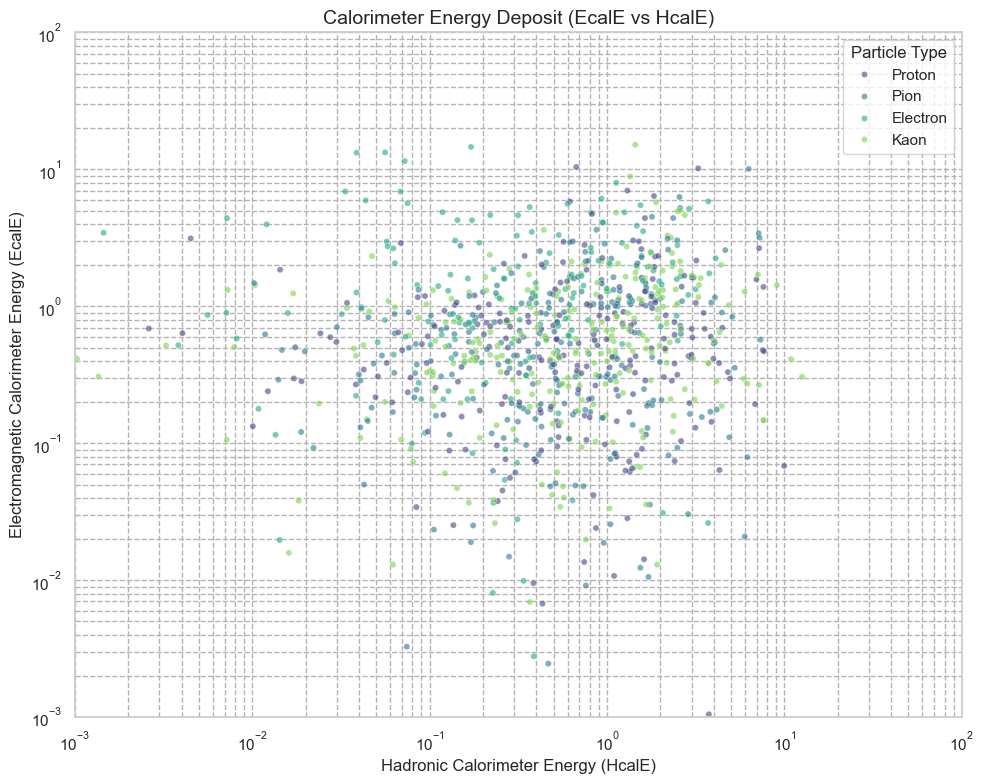

In [77]:

particle_subset = plot_df[plot_df['Particle_Label'].isin(['Electron', 'Proton', 'Pion', 'Kaon'])]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='HcalE', y='EcalE', hue='Particle_Label', data=particle_subset.sample(n=10000, random_state=42),
                alpha=0.6, s=20, palette='viridis') 

plt.xscale('log')
plt.yscale('log') 
plt.xlim(1e-3, 1e2)
plt.ylim(1e-3, 1e2)

plt.title('Calorimeter Energy Deposit (EcalE vs HcalE)', fontsize=14)
plt.xlabel('Hadronic Calorimeter Energy (HcalE)', fontsize=12)
plt.ylabel('Electromagnetic Calorimeter Energy (EcalE)', fontsize=12)
plt.legend(title='Particle Type')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()


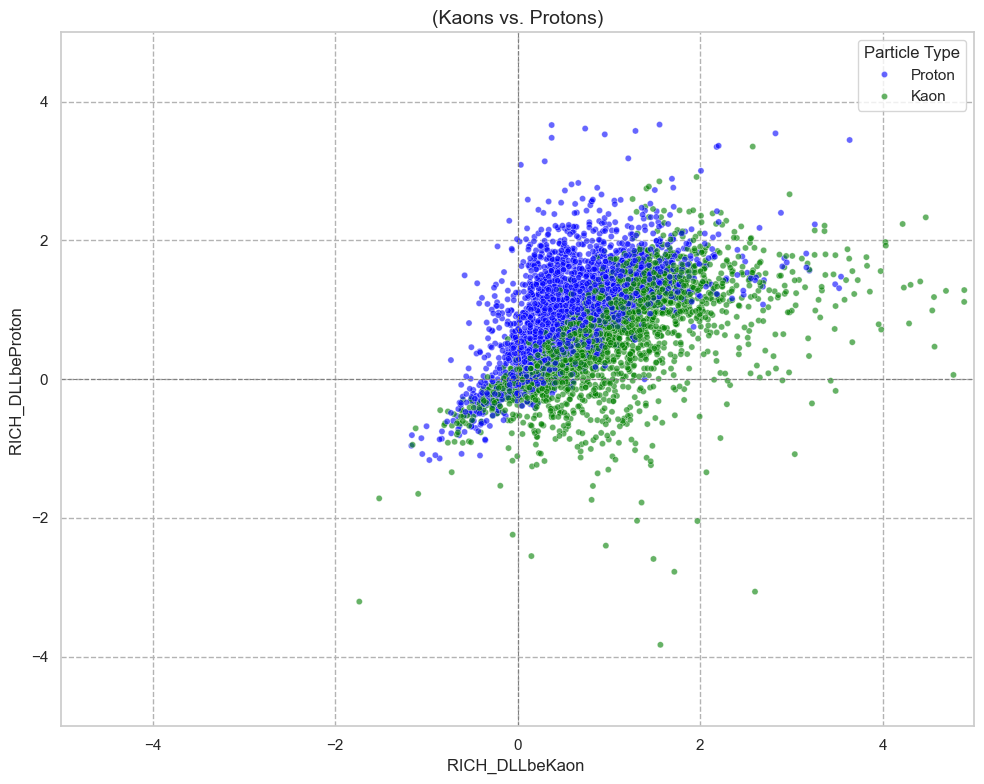

In [78]:

kp_subset = plot_df[plot_df['Particle_Label'].isin(['Kaon', 'Proton'])].sample(n=10000, random_state=42)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='RICH_DLLbeKaon', y='RICH_DLLbeProton', hue='Particle_Label', data=kp_subset,
                alpha=0.6, s=20, palette={'Kaon': 'green', 'Proton': 'blue'})

plt.xlim(-5, 5) 
plt.ylim(-5, 5)

plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) 
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)

plt.title('(Kaons vs. Protons)', fontsize=14)
plt.xlabel('RICH_DLLbeKaon ', fontsize=12)
plt.ylabel('RICH_DLLbeProton ', fontsize=12)
plt.legend(title='Particle Type')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

Plotting the 3 most important features the model used: ['MuonLLbeBCK', 'DLLelectron', 'MuonFlag']
Generating the final 3D anomaly plot... This might take a moment.


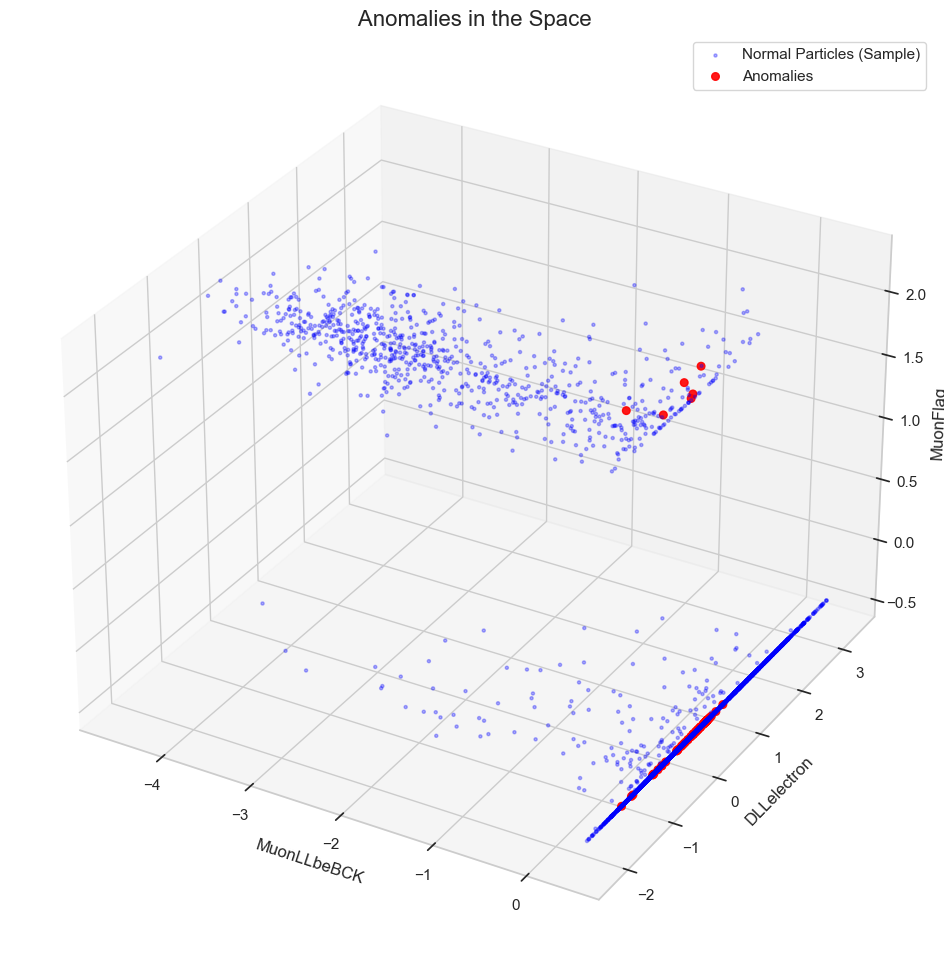

In [79]:
top_3_features = importance_df['Feature'].head(3).tolist()
print(f"Plotting the 3 most important features the model used: {top_3_features}")

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

anomaly_ids = most_anomalous_particles.head(100)['Original_ID']
anomaly_points = X_test_scaled_df.loc[anomaly_ids]

normal_ids = X_test_scaled_df.index.difference(anomaly_ids)
normal_sample_ids = np.random.choice(normal_ids, size=5000, replace=False)
normal_points = X_test_scaled_df.loc[normal_sample_ids]

print("Generating the final 3D anomaly plot... This might take a moment.")
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normal_points[top_3_features[0]],
           normal_points[top_3_features[1]],
           normal_points[top_3_features[2]],
           c='blue',
           alpha=0.3,  
           s=5,       
           label='Normal Particles (Sample)')

ax.scatter(anomaly_points[top_3_features[0]],
           anomaly_points[top_3_features[1]],
           anomaly_points[top_3_features[2]],
           c='red',
           alpha=0.9, 
           s=30,       
           label='Anomalies')

ax.set_xlabel(top_3_features[0], fontsize=12)
ax.set_ylabel(top_3_features[1], fontsize=12)
ax.set_zlabel(top_3_features[2], fontsize=12)
ax.set_title(' Anomalies in the Space', fontsize=16)

ax.legend()
plt.show()
